<a href="https://colab.research.google.com/github/ShivajiMallela/Deep-Learning-projects/blob/main/Predicting_Happiness_and_Sadness_Using_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Happy or Sad? A Convolutional Neural Network Approach to Emotion Prediction

This project aims to develop a Convolutional Neural Network (CNN) to predict human emotions, specifically happiness and sadness, from facial images. The steps involved in the project are as follows:

1. Data Collection: Creating dataset by collecting images from Google.

2. Data Preprocessing: Cleaning and preprocess the images to ensure consistency. This includes resizing images, normalizing pixel values, and augmenting the data to increase diversity and improve model robustness.

3. CNN Architecture Design: Design a CNN model architecture tailored for emotion recognition. This includes defining layers such as convolutional layers, pooling layers, and fully connected layers.

4. Model Training: Train the CNN model using the preprocessed dataset. This involves splitting the data into training and validation sets, defining a loss function, and optimizing the model using techniques like backpropagation and gradient descent.

5. Evaluation: Evaluate the trained model's performance using metrics as accuracy.

5. Fine-Tuning: Fine-tune the model by adjusting hyperparameters and experimenting with different architectures to improve accuracy and generalization.

### Import necessary libraries

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
%matplotlib inline

Getting GPU

To connect to a GPU in Google Colab

1. Click on "Runtime" in the menu.
2. Select "Change runtime type."
3. In the pop-up window, change the "Hardware accelerator" to "GPU."
4. Click "Save."

Run the following code in a code cell to check if the GPU is available:

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

If We've got access to a GPU, the cell above should output something like:

`[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]`


Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import imghdr

# Get the data

For this project I'm going to download images of people who are Happy and Sad from [Google](https://images.google.com/).

In [5]:
!ls /content/drive/

MyDrive


In [6]:
# Data directory
data_dir = '/content/drive/MyDrive/Data'

In [7]:
# Function to rename files in a folder
def rename_images(folder_path, prefix):
    file_list = os.listdir(folder_path)
    for i, filename in enumerate(file_list):
        # Get the file extension
        file_extension = os.path.splitext(filename)[1]

        # Construct the new name
        new_name = f"{prefix} {i + 1}{file_extension}"

        # Construct the full file paths
        old_file = os.path.join(folder_path, filename)
        new_file = os.path.join(folder_path, new_name)

        # Rename the file
        os.rename(old_file, new_file)
    print(f"All files in {folder_path} have been renamed.")

#Define the paths to your folders
happy_folder_path = '/content/drive/MyDrive/Data/Happy'
sad_folder_path = '/content/drive/MyDrive/Data/Sad'

#Rename the images in each folder
rename_images(happy_folder_path, "happy")
rename_images(sad_folder_path, "sad")

All files in /content/drive/MyDrive/Data/Happy have been renamed.
All files in /content/drive/MyDrive/Data/Sad have been renamed.


In [8]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

# Get the Image Resolutions
imgs = [img.name for img in Path('/content/drive/MyDrive/Data/Happy/').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get('/content/drive/MyDrive/Data/Happy/'+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns')
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head(80)

Total Nr of Images in the dataset: 85


FileName        Size  Width  Height  Aspect Ratio
0    happy 1.jpg  (612, 421)    612     421          1.45
1    happy 2.jpg  (612, 346)    612     346          1.77
2    happy 3.jpg  (612, 408)    612     408          1.50
3    happy 4.jpg  (612, 408)    612     408          1.50
4    happy 5.jpg  (612, 408)    612     408          1.50
..           ...         ...    ...     ...           ...
75  happy 79.jpg  (612, 408)    612     408          1.50
76  happy 80.jpg  (612, 391)    612     391          1.57
77  happy 61.jpg  (612, 408)    612     408          1.50
78  happy 82.jpg  (612, 408)    612     408          1.50
79  happy 83.jpg  (612, 389)    612     389          1.57

[80 rows x 5 columns]

In [9]:
# Assuming 'img_meta_df' is your DataFrame and it has 'Width', 'Height', and 'FileName' columns

# Filter images based on the specified conditions
filtered_df = img_meta_df[(img_meta_df["Width"] < 600) | (img_meta_df["Height"] > 500)]
print(filtered_df.shape)

# Print the file names and corresponding width and height
for index, row in filtered_df.iterrows():
    print("File Name:", row["FileName"], "Width:", row["Width"], "Height:", row["Height"])


(0, 5)


Text(0, 0.5, 'Height')

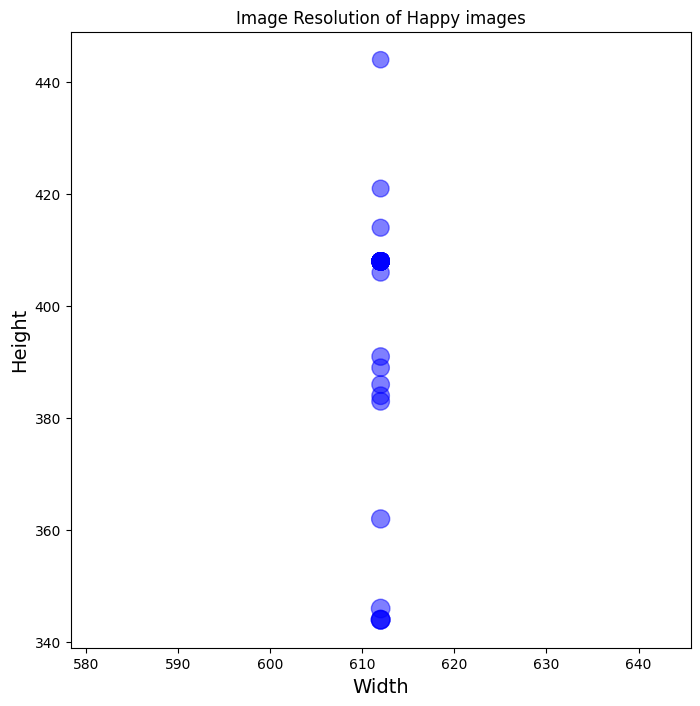

In [10]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution of Happy images")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [11]:
# Identify Image Resolutions

# Import Packages
import pandas as pd
import matplotlib.pyplot  as plt
from PIL import Image
from pathlib import Path
import imagesize
import numpy as np

# Get the Image Resolutions
imgs = [img.name for img in Path('/content/drive/MyDrive/Data/Sad/').iterdir() if img.suffix == ".jpg"]
img_meta = {}
for f in imgs: img_meta[str(f)] = imagesize.get('/content/drive/MyDrive/Data/Sad/'+f)

# Convert it to Dataframe and compute aspect ratio
img_meta_df = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns')
img_meta_df[["Width", "Height"]] = pd.DataFrame(img_meta_df["Size"].tolist(), index=img_meta_df.index)
img_meta_df["Aspect Ratio"] = round(img_meta_df["Width"] / img_meta_df["Height"], 2)

print(f'Total Nr of Images in the dataset: {len(img_meta_df)}')
img_meta_df.head()

Total Nr of Images in the dataset: 96


FileName        Size  Width  Height  Aspect Ratio
0   sad 1.jpg  (612, 408)    612     408           1.5
1   sad 3.jpg  (612, 408)    612     408           1.5
2   sad 8.jpg  (612, 408)    612     408           1.5
3  sad 13.jpg  (612, 408)    612     408           1.5
4  sad 17.jpg  (612, 408)    612     408           1.5

Text(0, 0.5, 'Height')

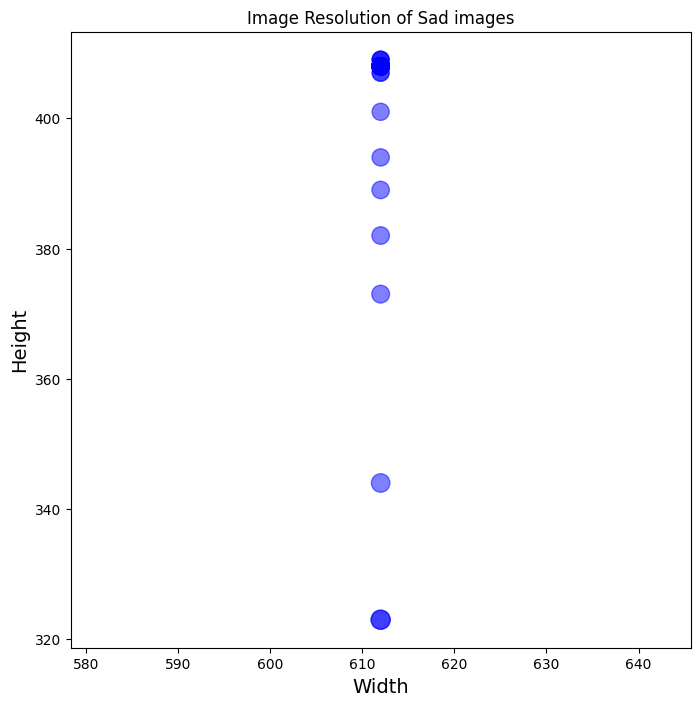

In [12]:
# Visualize Image Resolutions

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df.Width, img_meta_df.Height, color='blue', alpha=0.5, s=img_meta_df["Aspect Ratio"]*100, picker=True)
ax.set_title("Image Resolution of Sad images")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)

In [13]:
# Assuming 'img_meta_df' is your DataFrame and it has 'Width', 'Height', and 'FileName' columns

# Filter images based on the specified conditions
filtered_df = img_meta_df[(img_meta_df["Width"] < 600) | (img_meta_df["Height"] > 500)]
print(filtered_df.shape)

# Print the file names and corresponding width and height
for index, row in filtered_df.iterrows():
    print("File Name:", row["FileName"], "Width:", row["Width"], "Height:", row["Height"])


(0, 5)


In [14]:
# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk(data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 3 directories and 0 images in '/content/drive/MyDrive/Data'
There are 0 directories and 96 images in '/content/drive/MyDrive/Data/Sad'
There are 0 directories and 85 images in '/content/drive/MyDrive/Data/Happy'
There are 0 directories and 5 images in '/content/drive/MyDrive/Data/images'


In [15]:
# Get the class names
class_names = [name for name in os.listdir(data_dir)][0:2]
class_names

['Sad', 'Happy']

In [16]:
# Predefining the image extensions
image_exts = ['jpg','jpeg','bmp','png']
image_exts

['jpg', 'jpeg', 'bmp', 'png']

## Remove unwanted or noisy images.

In [17]:
# Function to verify image extension
def is_valid_image(image_path):
    # Check file extension
    ext = os.path.splitext(image_path)[1][1:].lower()  # Get the extension and convert to lower case
    if ext not in image_exts:
        return False

    # Check image content using imghdr.what
    tip = imghdr.what(image_path)
    if tip is None:
        return False

    # Verify file content
    img = cv2.imread(image_path)
    if img is None:
        return False
    return True

# Iterate through each class directory
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    if not os.path.isdir(class_dir):
        continue  # Skip if not a directory

    # Iterate through each image in the class directory
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)

        # Check if the image is valid
        if not is_valid_image(image_path):
            print(f"Removing invalid image: {image_path}")
            os.remove(image_path)

print("Image validation and cleaning complete.")

Image validation and cleaning complete.


In [18]:
# Get the length of "happy" folder
len(os.listdir(happy_folder_path))

85

In [19]:
# Get the length of "sad" folder
len(os.listdir(sad_folder_path))

96

## Visualize the data

In [20]:
import matplotlib.image as mpimg
import random

# Function to display random image
def view_random_image(target_dir, target_class):

  # target folder to get images from
  target_folder = target_dir+target_class

  # select a random image from target folder
  random_image = random.sample(os.listdir(target_folder), 1)

  # print selected image
  print(random_image)

  # Read the image and plot it.
  img = mpimg.imread(os.path.join(target_folder,random_image[0]))
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}") #shape of the image

  return img;

['happy 67.jpg']
Image shape: (408, 612, 3)


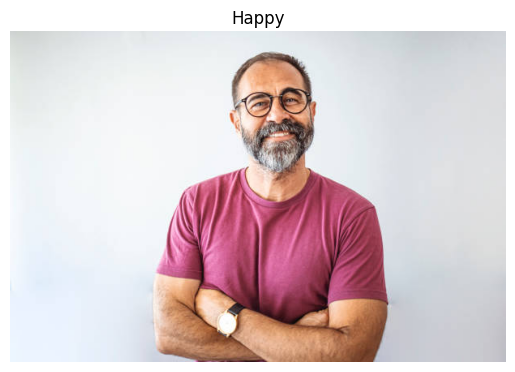

In [21]:
# view an image from "Happy" class
img = view_random_image('drive/MyDrive/Data/', "Happy")

['sad 72.jpg']
Image shape: (323, 612, 3)


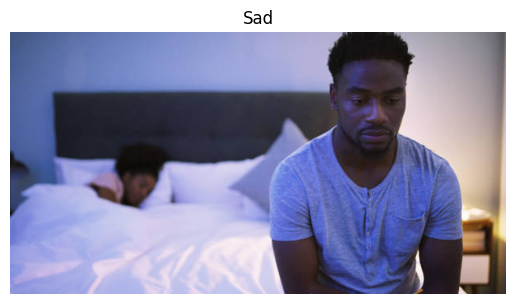

In [22]:
# view an image from "Sad" class
img = view_random_image('drive/MyDrive/Data/', "Sad")

# Preprocess the data

## Split data into training and testing

We going to split 80% of our data into training set and 20% into test set.

In [23]:
# total length of happy folder
total_happy = len(os.listdir(happy_folder_path))

# 80% of the happy folder
happy_80 = int(len(os.listdir(happy_folder_path))*0.8)

# 20% of the happy folder
happy_20 = len(os.listdir(happy_folder_path)) - happy_80

# display the length
print(f"There are total {total_happy} images in the 'happy' folder, 80% of it is '{happy_80}' and 20% of it is '{happy_20}'.")

There are total 85 images in the 'happy' folder, 80% of it is '68' and 20% of it is '17'.


In [24]:
# total length of sad folder
total_sad = len(os.listdir(sad_folder_path))

# 80% of the sad folder
sad_80 = int(len(os.listdir(sad_folder_path))*0.8)

# 20% of the sad folder
sad_20 = len(os.listdir(sad_folder_path)) - sad_80

# display the length
print(f"There are total {total_sad} images in the 'sad' folder, 80% of it is '{sad_80}' and 20% of it is '{sad_20}'.")

There are total 96 images in the 'sad' folder, 80% of it is '76' and 20% of it is '20'.


## Create train and test dataframes

In [25]:
# Collect file paths and labels
train_files = []
train_labels = []

for file in os.listdir(happy_folder_path)[:happy_80]:
    train_files.append(os.path.join(happy_folder_path, file))
    train_labels.append('happy')

for file in os.listdir(sad_folder_path)[:sad_80]:
    train_files.append(os.path.join(sad_folder_path, file))
    train_labels.append('sad')

test_files = []
test_labels = []

for file in os.listdir(happy_folder_path)[happy_80:]:
    test_files.append(os.path.join(happy_folder_path, file))
    test_labels.append('happy')

for file in os.listdir(sad_folder_path)[sad_80:]:
    test_files.append(os.path.join(sad_folder_path, file))
    test_labels.append('sad')

# Create DataFrames
train_df = pd.DataFrame({'file_path': train_files, 'label': train_labels})
test_df = pd.DataFrame({'file_path': test_files, 'label': test_labels})

# Print the DataFrames to verify
train_df.head()

file_path  label
0  /content/drive/MyDrive/Data/Happy/happy 1.jpg  happy
1  /content/drive/MyDrive/Data/Happy/happy 2.jpg  happy
2  /content/drive/MyDrive/Data/Happy/happy 3.jpg  happy
3  /content/drive/MyDrive/Data/Happy/happy 4.jpg  happy
4  /content/drive/MyDrive/Data/Happy/happy 5.jpg  happy

In [26]:
test_df.head()

file_path  label
0  /content/drive/MyDrive/Data/Happy/happy 69.jpg  happy
1  /content/drive/MyDrive/Data/Happy/happy 46.jpg  happy
2  /content/drive/MyDrive/Data/Happy/happy 47.jpg  happy
3  /content/drive/MyDrive/Data/Happy/happy 48.jpg  happy
4  /content/drive/MyDrive/Data/Happy/happy 49.jpg  happy

## Scaling data and turning it into batches

In [27]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [28]:
# Turn the data into batches and apply some functions to it
train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                               x_col = 'file_path',
                                               y_col = 'label',
                                               target_size=(400, 612), # resizing the image
                                               class_mode='binary',
                                               batch_size=32, # turning our data into batches
                                               shuffle=True)

test_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                             x_col='file_path',
                                             y_col='label',
                                             target_size=(400,612),
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=True)

Found 144 validated image filenames belonging to 2 classes.
Found 37 validated image filenames belonging to 2 classes.


In [29]:
# Get a sample of training data batch and get shapes of it
images, labels = train_data.next()
images.shape, labels.shape

((32, 400, 612, 3), (32,))

In [30]:
images[0]

array([[[0.6039216 , 0.72156864, 0.75294125],
        [0.6       , 0.7176471 , 0.7490196 ],
        [0.5882353 , 0.70980394, 0.7294118 ],
        ...,
        [0.86666673, 0.86666673, 0.8980393 ],
        [0.8705883 , 0.8705883 , 0.90196085],
        [0.8745099 , 0.8745099 , 0.9058824 ]],

       [[0.6117647 , 0.7254902 , 0.7568628 ],
        [0.59607846, 0.70980394, 0.73333335],
        [0.5764706 , 0.6901961 , 0.7137255 ],
        ...,
        [0.8862746 , 0.8862746 , 0.9176471 ],
        [0.8941177 , 0.8941177 , 0.92549026],
        [0.8980393 , 0.8980393 , 0.9294118 ]],

       [[0.6117647 , 0.7254902 , 0.7490196 ],
        [0.58431375, 0.69803923, 0.72156864],
        [0.54901963, 0.6627451 , 0.6784314 ],
        ...,
        [0.9176471 , 0.9176471 , 0.9490197 ],
        [0.9215687 , 0.9215687 , 0.95294124],
        [0.92549026, 0.92549026, 0.9568628 ]],

       ...,

       [[0.9921569 , 0.9960785 , 0.97647065],
        [0.9921569 , 1.        , 0.9803922 ],
        [0.9803922 , 1

In [31]:
labels

array([1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0.],
      dtype=float32)

In [32]:
images.min(), images.max()

(0.0, 1.0)

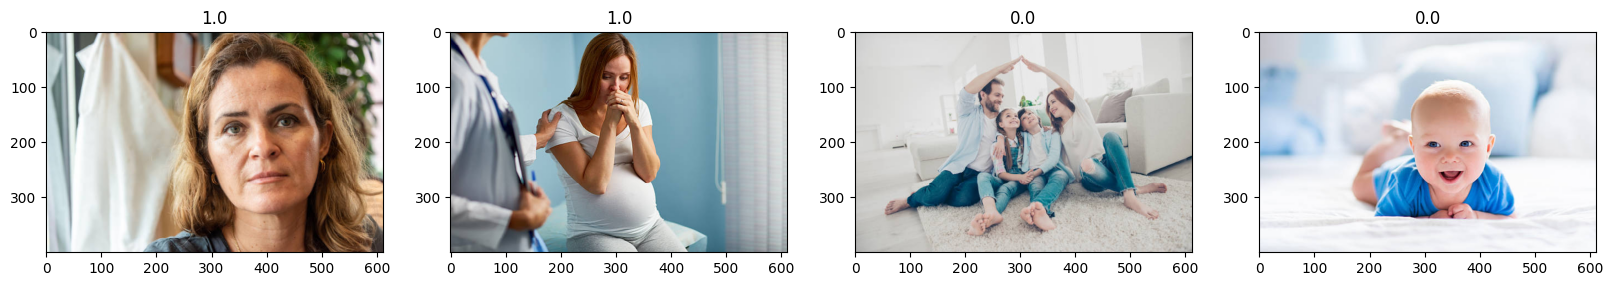

In [33]:
# Let's find out which label is assigned for happy and sad
fig, ax = plt.subplots(ncols=4, figsize=(20, 6))

# Iterate through the first 4 images and corresponding axes
for i, img in enumerate(images[:4]):
    ax[i].imshow(img)
    ax[i].title.set_text(labels[i])  # Hide axes for better visualization

plt.show()

Look's like `0` is for happy and `1` is for sad

# Build a model

## Create the model

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [71]:
# Create the model (A basic model)
model_1 = Sequential([
    Conv2D( 32, 3, activation='relu', input_shape=(400,612,3)),
    MaxPool2D(),

    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# COmpile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the data
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
5/5 [==============================] - 10s 870ms/step - loss: 21.5295 - accuracy: 0.5208 - val_loss: 14.7294 - val_accuracy: 0.4595
Epoch 2/10
5/5 [==============================] - 3s 532ms/step - loss: 6.8624 - accuracy: 0.5000 - val_loss: 1.6631 - val_accuracy: 0.5405
Epoch 3/10
5/5 [==============================] - 3s 674ms/step - loss: 1.2418 - accuracy: 0.4722 - val_loss: 1.0252 - val_accuracy: 0.5135
Epoch 4/10
5/5 [==============================] - 3s 484ms/step - loss: 0.5661 - accuracy: 0.6806 - val_loss: 0.6589 - val_accuracy: 0.5135
Epoch 5/10
5/5 [==============================] - 3s 567ms/step - loss: 0.3545 - accuracy: 0.9375 - val_loss: 0.7683 - val_accuracy: 0.5676
Epoch 6/10
5/5 [==============================] - 3s 501ms/step - loss: 0.2134 - accuracy: 0.9375 - val_loss: 1.5950 - val_accuracy: 0.4595
Epoch 7/10
5/5 [==============================] - 3s 638ms/step - loss: 0.0983 - accuracy: 0.9861 - val_loss: 1.2581 - val_accuracy: 0.4595
Epoch 8/10
5/5 [=

In [72]:
# Evaluating the model
model_1.evaluate(test_data)

2/2 [==============================] - 0s 22ms/step - loss: 2.0674 - accuracy: 0.4054


[2.067396402359009, 0.4054054021835327]

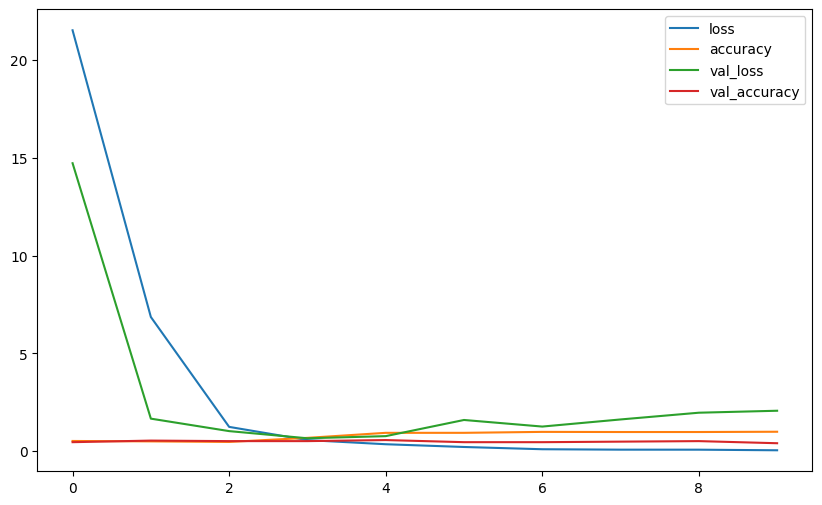

In [73]:
# Plot loss curves
pd.DataFrame(history_1.history).plot(figsize=(10,6));

## Plotting loss curves
plot the loss and accuracy curves seperately

In [36]:
# Creating a plotting function to use again for plotting the curves seperately
def plot_curves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot loss
  plt.figure(figsize=(14, 6))
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='Training_loss')
  plt.plot(epochs, val_loss, label='Validation_loss')
  plt.title('Loss curves')
  plt.xlabel('Epochs')
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label='Validation_acccuracy')
  plt.title('Accuracy curves')
  plt.xlabel('Epochs')
  plt.legend();

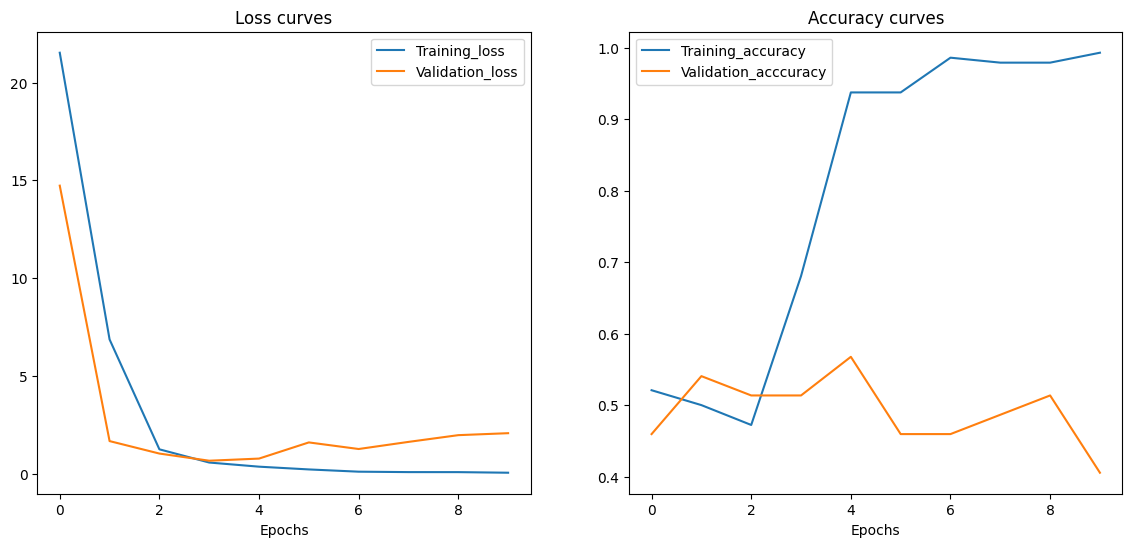

In [74]:
plot_curves(history_1)

In [37]:
# Create the model (A basic model)
model_2 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(400,612,3)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(),

    Conv2D(32, 3, activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the data
history_2 = model_2.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
5/5 [==============================] - 37s 3s/step - loss: 15.2584 - accuracy: 0.4653 - val_loss: 0.6884 - val_accuracy: 0.5405
Epoch 2/10
5/5 [==============================] - 3s 751ms/step - loss: 0.8792 - accuracy: 0.5000 - val_loss: 0.6906 - val_accuracy: 0.5676
Epoch 3/10
5/5 [==============================] - 3s 514ms/step - loss: 0.7077 - accuracy: 0.5764 - val_loss: 0.6754 - val_accuracy: 0.5135
Epoch 4/10
5/5 [==============================] - 3s 627ms/step - loss: 0.6528 - accuracy: 0.7083 - val_loss: 0.6725 - val_accuracy: 0.5946
Epoch 5/10
5/5 [==============================] - 4s 724ms/step - loss: 0.6421 - accuracy: 0.6042 - val_loss: 0.6557 - val_accuracy: 0.5946
Epoch 6/10
5/5 [==============================] - 3s 526ms/step - loss: 0.5597 - accuracy: 0.7292 - val_loss: 0.7272 - val_accuracy: 0.4865
Epoch 7/10
5/5 [==============================] - 3s 552ms/step - loss: 0.5036 - accuracy: 0.8264 - val_loss: 0.7238 - val_accuracy: 0.5676
Epoch 8/10
5/5 [=====

In [38]:
model_2.evaluate(test_data)

2/2 [==============================] - 1s 34ms/step - loss: 0.9966 - accuracy: 0.5946


[0.9965556263923645, 0.5945945978164673]

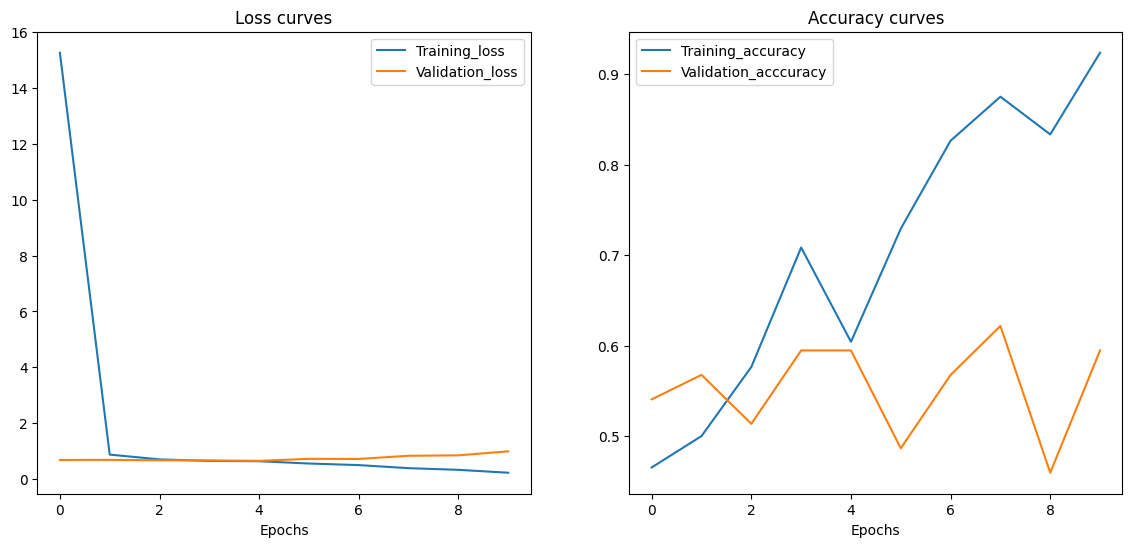

In [39]:
plot_curves(history_2)

In [40]:
# Initialize the Sequential model
model_3 = Sequential([
    Conv2D(16, (3, 3), 1, activation="relu", input_shape=(400, 612, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Fit the data
history_3 = model_3.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
5/5 [==============================] - 10s 1s/step - loss: 4.8582 - accuracy: 0.5556 - val_loss: 0.8908 - val_accuracy: 0.4595
Epoch 2/10
5/5 [==============================] - 3s 703ms/step - loss: 0.7004 - accuracy: 0.5417 - val_loss: 0.7660 - val_accuracy: 0.4595
Epoch 3/10
5/5 [==============================] - 2s 539ms/step - loss: 0.6987 - accuracy: 0.6181 - val_loss: 0.7098 - val_accuracy: 0.5135
Epoch 4/10
5/5 [==============================] - 2s 472ms/step - loss: 0.7099 - accuracy: 0.5694 - val_loss: 0.6899 - val_accuracy: 0.4865
Epoch 5/10
5/5 [==============================] - 2s 477ms/step - loss: 0.6121 - accuracy: 0.8681 - val_loss: 0.6839 - val_accuracy: 0.6216
Epoch 6/10
5/5 [==============================] - 2s 475ms/step - loss: 0.5951 - accuracy: 0.7153 - val_loss: 0.7062 - val_accuracy: 0.5405
Epoch 7/10
5/5 [==============================] - 3s 698ms/step - loss: 0.4922 - accuracy: 0.8542 - val_loss: 0.6913 - val_accuracy: 0.4865
Epoch 8/10
5/5 [======

In [42]:
model_3.evaluate(test_data)

2/2 [==============================] - 1s 99ms/step - loss: 0.8354 - accuracy: 0.5405


[0.8353538513183594, 0.5405405163764954]

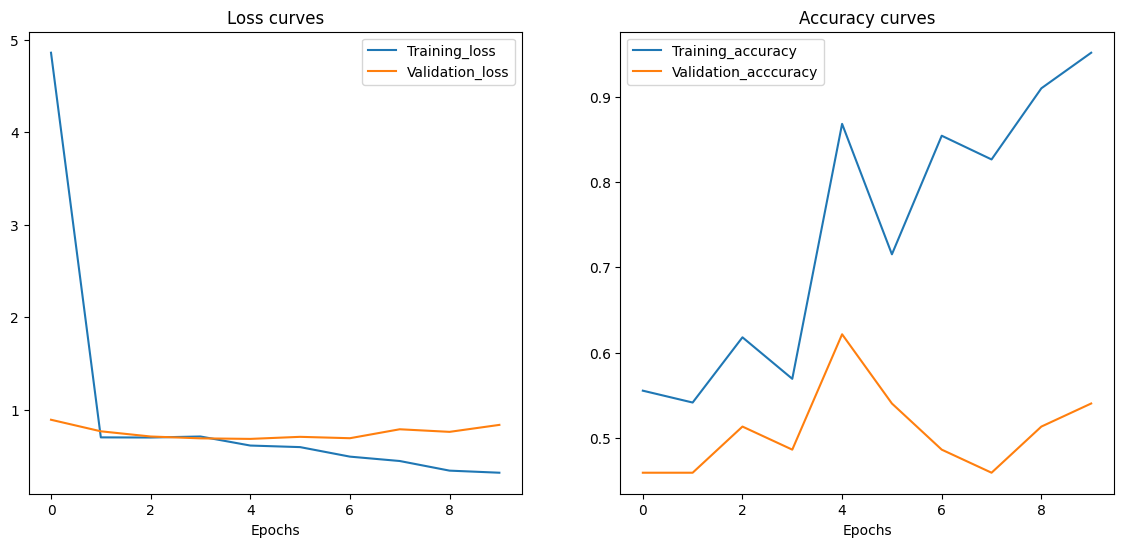

In [41]:
plot_curves(history_3)

# Data augmentation

In [46]:
# Create ImageDataGenerator training instance with data augmentat
train_gen_aug = ImageDataGenerator(rescale=1/255.,
                               rotation_range=20,
                               shear_range=0.3,
                               zoom_range=0.3,
                               width_shift_range=0.2,
                               height_shift_range=0.3,
                               horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [47]:
# Import data and augment it from training dataframe
print("Augmented training images:")
train_aug = train_gen_aug.flow_from_dataframe(train_df,
                                          x_col='file_path',
                                          y_col='label',
                                          target_size=(400, 612),
                                          batch_size=32,
                                          class_mode='binary',
                                          shuffle=True)


# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_dataframe(train_df,
                                               x_col='file_path',
                                               y_col = 'label',
                                               target_size=(400, 612),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

print("Unchanged test images:")
test_data = test_datagen.flow_from_dataframe(test_df,
                                             x_col='file_path',
                                             y_col = 'label',
                                             target_size=(400, 612),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 144 validated image filenames belonging to 2 classes.
Non-augmented training images:
Found 144 validated image filenames belonging to 2 classes.
Unchanged test images:
Found 37 validated image filenames belonging to 2 classes.


In [48]:
# Get the batch samples
images, labels = train_data.next()
aug_images, aug_labels = train_aug.next()

(-0.5, 611.5, 399.5, -0.5)

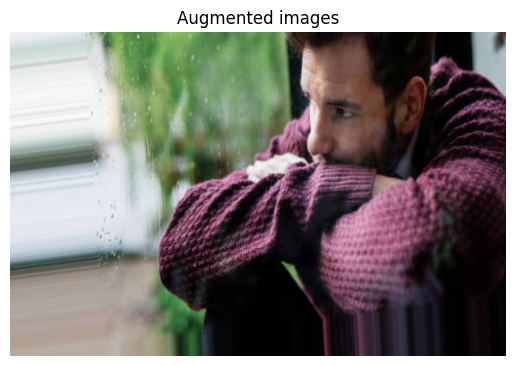

In [57]:
random_number = random.randint(1, 31)
plt.imshow(aug_images[random_number])
plt.title("Augmented images")
plt.axis(False)

In [59]:
# Initialize the Sequential model
model_4 = Sequential([
    Conv2D(16, (3, 3), 1, activation="relu", input_shape=(400, 612, 3)),
    MaxPool2D(),
    Conv2D(32, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Conv2D(16, (3, 3), 1, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

history_4 = model_4.fit(train_aug,
                        epochs=10,
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/10
5/5 [==============================] - 14s 2s/step - loss: 4.2603 - accuracy: 0.4722 - val_loss: 1.1085 - val_accuracy: 0.4595
Epoch 2/10
5/5 [==============================] - 10s 2s/step - loss: 0.8077 - accuracy: 0.5347 - val_loss: 0.7469 - val_accuracy: 0.5405
Epoch 3/10
5/5 [==============================] - 9s 2s/step - loss: 0.7372 - accuracy: 0.4444 - val_loss: 0.6865 - val_accuracy: 0.4595
Epoch 4/10
5/5 [==============================] - 10s 2s/step - loss: 0.6894 - accuracy: 0.4722 - val_loss: 0.6948 - val_accuracy: 0.4595
Epoch 5/10
5/5 [==============================] - 12s 2s/step - loss: 0.6869 - accuracy: 0.4792 - val_loss: 0.7028 - val_accuracy: 0.4595
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 0.6857 - accuracy: 0.5000 - val_loss: 0.7048 - val_accuracy: 0.4595
Epoch 7/10
5/5 [==============================] - 10s 2s/step - loss: 0.6863 - accuracy: 0.5347 - val_loss: 0.7126 - val_accuracy: 0.4865
Epoch 8/10
5/5 [===================

In [60]:
model_4.evaluate(test_data)

2/2 [==============================] - 1s 67ms/step - loss: 0.6953 - accuracy: 0.4595


[0.6953134536743164, 0.45945945382118225]

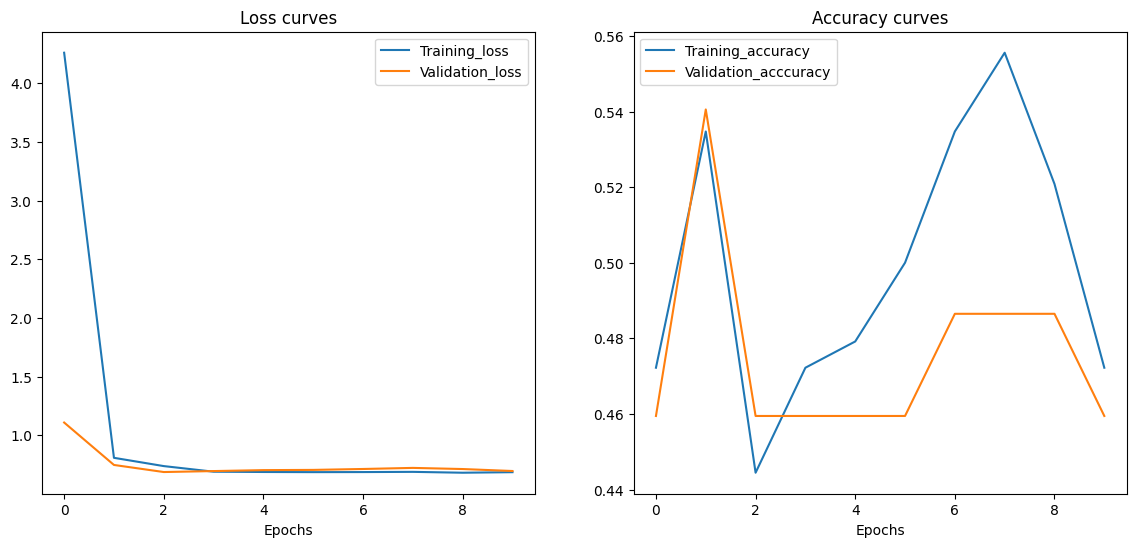

In [61]:
plot_curves(history_4)

# Making a prediction

Let's try to predict an image on the current model, as this is a practice project i can't able to get higher accuracy for this dataset, later i'll try to improve it when i can.

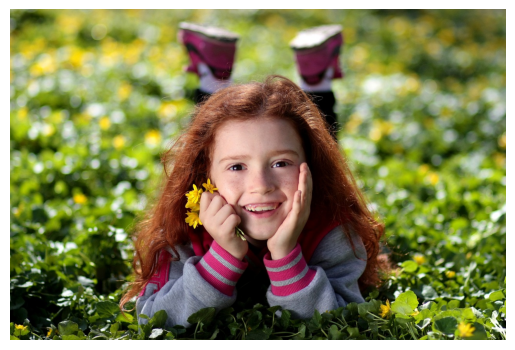

In [62]:
# Load the image and visualize it
img = mpimg.imread("/content/drive/MyDrive/Data/images/happy_2.jpg")
plt.imshow(img)
plt.axis(False);

In [63]:
img.shape

(853, 1280, 3)

In [67]:
def load_and_prep_image(filepath, img_shape=(400, 612)):

  # Read the image
  img = tf.io.read_file(filepath)

  # Decode the image
  img = tf.image.decode_image(img, channels=3)

  # Resize the image into (224, 224)
  img = tf.image.resize(img, size=img_shape)

  # scale the image
  img = img/255.

  return img

In [68]:
img = load_and_prep_image("/content/drive/MyDrive/Data/images/happy_2.jpg")

In [69]:
def pred_and_plot(model, filename, class_names):

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 1s 1s/step


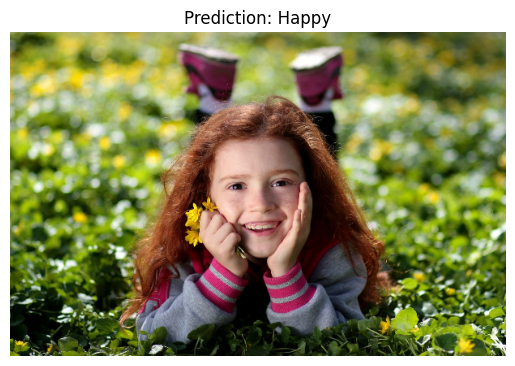

In [75]:
pred_and_plot(model_2, '/content/drive/MyDrive/Data/images/happy_2.jpg', class_names)

1/1 [==============================] - 0s 95ms/step


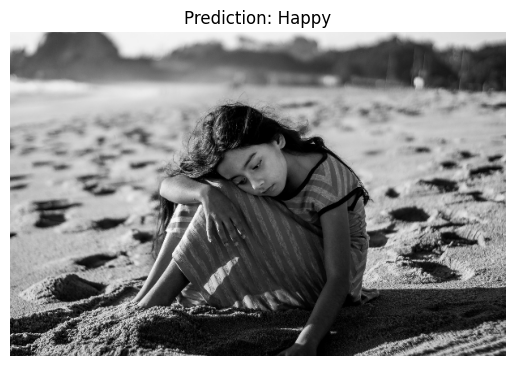

In [76]:
pred_and_plot(model_2, '/content/drive/MyDrive/Data/images/sad_image.jpg', class_names)

1/1 [==============================] - 0s 29ms/step


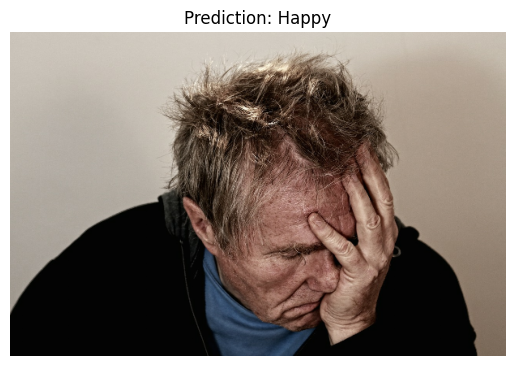

In [77]:
pred_and_plot(model_2, '/content/drive/MyDrive/Data/images/sad_image2.jpg', class_names)

1/1 [==============================] - 0s 34ms/step


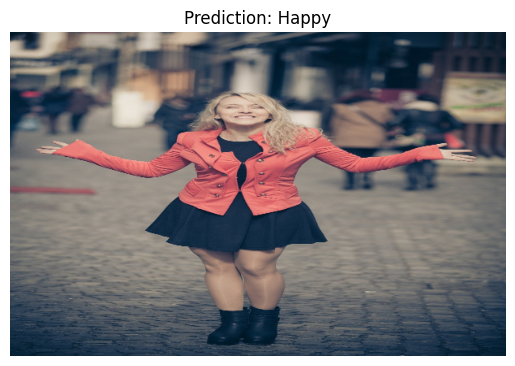

In [78]:
pred_and_plot(model_2, '/content/drive/MyDrive/Data/images/image_happy2.jpg', class_names)

1/1 [==============================] - 0s 20ms/step


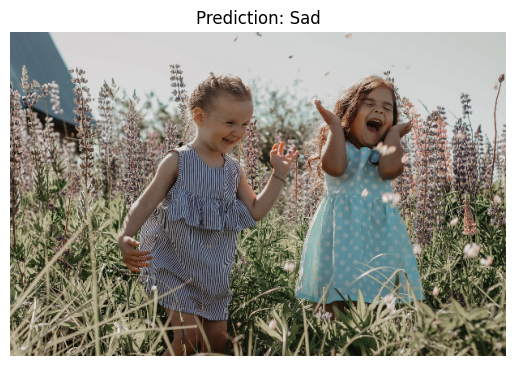

In [79]:
pred_and_plot(model_2, '/content/drive/MyDrive/Data/images/image_happy.jpg', class_names)

# Using Transfer learning

Using ResNet_v2_50 to see if it works

In [80]:
# Resnet 50 v2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

In [81]:
import tensorflow_hub as hub
from tensorflow.keras import layers

In [93]:
IMAGE_SHAPE = (400, 612)
BATCH_SIZE = 32

# Create a function to use it again for multiple models
def build_model(model_url):

  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name='Feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,))
  model = tf.keras.Sequential([
      feature_extractor_layer,
      layers.Dense(1, activation='softmax', name='output_layer')
  ])

  model.compile(loss='binary_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

  return model

In [94]:
# create model
resnet_model = build_model(resnet_url)

In [121]:
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch = len(train_data),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Epoch 1/5
5/5 [==============================] - 11s 813ms/step - loss: 0.7244 - accuracy: 0.5278 - val_loss: 0.6667 - val_accuracy: 0.5405
Epoch 2/5
5/5 [==============================] - 3s 608ms/step - loss: 0.6444 - accuracy: 0.5278 - val_loss: 0.6410 - val_accuracy: 0.5405
Epoch 3/5
5/5 [==============================] - 4s 728ms/step - loss: 0.5973 - accuracy: 0.5278 - val_loss: 0.6221 - val_accuracy: 0.5405
Epoch 4/5
5/5 [==============================] - 3s 598ms/step - loss: 0.5422 - accuracy: 0.5278 - val_loss: 0.6143 - val_accuracy: 0.5405
Epoch 5/5
5/5 [==============================] - 3s 721ms/step - loss: 0.5102 - accuracy: 0.5278 - val_loss: 0.6152 - val_accuracy: 0.5405


1/1 [==============================] - 2s 2s/step


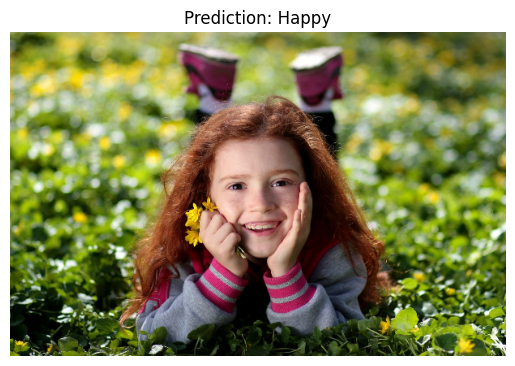

In [85]:
pred_and_plot(resnet_model, '/content/drive/MyDrive/Data/images/happy_2.jpg', class_names)

1/1 [==============================] - 0s 23ms/step


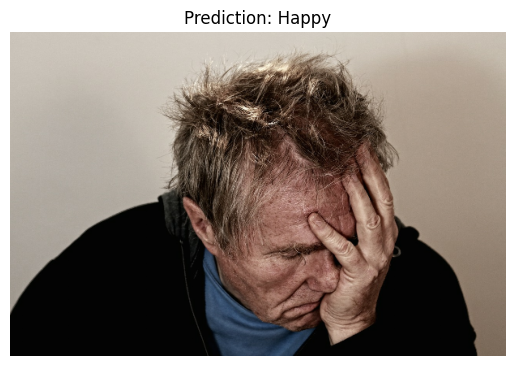

In [86]:
pred_and_plot(resnet_model, '/content/drive/MyDrive/Data/images/sad_image2.jpg', class_names)

In [89]:
resnet_history_aug = resnet_model.fit(train_aug,
                                  epochs=5,
                                  steps_per_epoch = len(train_aug),
                                  validation_data = test_data,
                                  validation_steps = len(test_data))

Epoch 1/5
5/5 [==============================] - 10s 2s/step - loss: 0.5006 - accuracy: 0.5278 - val_loss: 0.5853 - val_accuracy: 0.5405
Epoch 2/5
5/5 [==============================] - 11s 2s/step - loss: 0.5003 - accuracy: 0.5278 - val_loss: 0.5789 - val_accuracy: 0.5405
Epoch 3/5
5/5 [==============================] - 12s 2s/step - loss: 0.4441 - accuracy: 0.5278 - val_loss: 0.5752 - val_accuracy: 0.5405
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.4341 - accuracy: 0.5278 - val_loss: 0.5708 - val_accuracy: 0.5405
Epoch 5/5
5/5 [==============================] - 10s 2s/step - loss: 0.4351 - accuracy: 0.5278 - val_loss: 0.5683 - val_accuracy: 0.5405


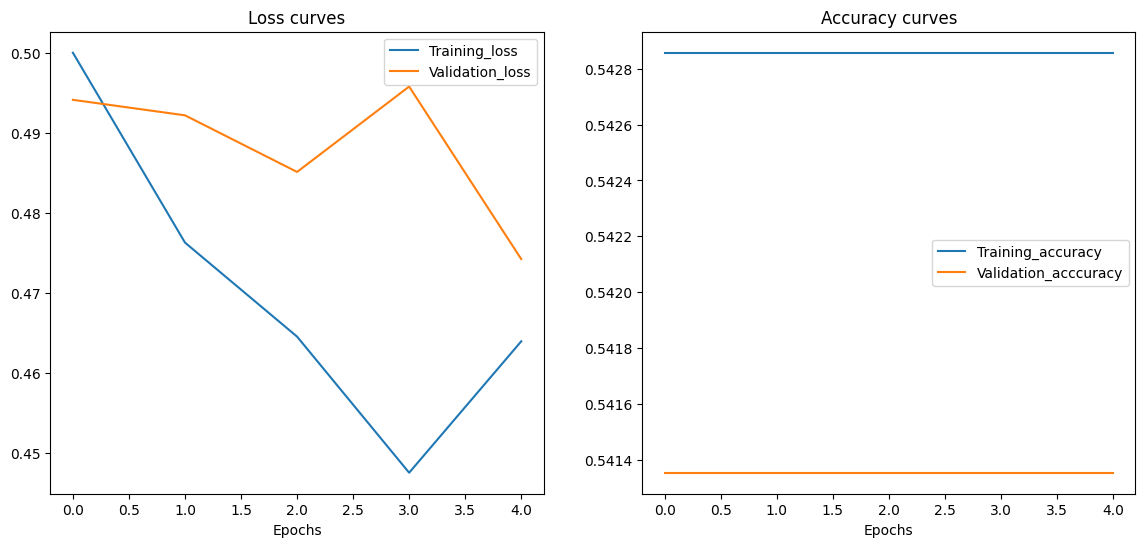

In [ ]:
plot_curves(resnet_history)

In [95]:
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [96]:
efficientnet_model = build_model(efficientnet_url)

In [98]:
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs=10,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/10
5/5 [==============================] - 4s 867ms/step - loss: 0.5063 - accuracy: 0.5278 - val_loss: 0.5913 - val_accuracy: 0.5405
Epoch 2/10
5/5 [==============================] - 3s 566ms/step - loss: 0.4822 - accuracy: 0.5278 - val_loss: 0.5832 - val_accuracy: 0.5405
Epoch 3/10
5/5 [==============================] - 3s 570ms/step - loss: 0.4644 - accuracy: 0.5278 - val_loss: 0.5763 - val_accuracy: 0.5405
Epoch 4/10
5/5 [==============================] - 3s 564ms/step - loss: 0.4436 - accuracy: 0.5278 - val_loss: 0.5697 - val_accuracy: 0.5405
Epoch 5/10
5/5 [==============================] - 4s 793ms/step - loss: 0.4267 - accuracy: 0.5278 - val_loss: 0.5654 - val_accuracy: 0.5405
Epoch 6/10
5/5 [==============================] - 3s 575ms/step - loss: 0.4137 - accuracy: 0.5278 - val_loss: 0.5620 - val_accuracy: 0.5405
Epoch 7/10
5/5 [==============================] - 3s 555ms/step - loss: 0.3998 - accuracy: 0.5278 - val_loss: 0.5588 - val_accuracy: 0.5405
Epoch 8/10
5/5 [====

In [99]:
efficientnet_model.evaluate(test_data)

2/2 [==============================] - 1s 56ms/step - loss: 0.5521 - accuracy: 0.5405


[0.5521323680877686, 0.5405405163764954]

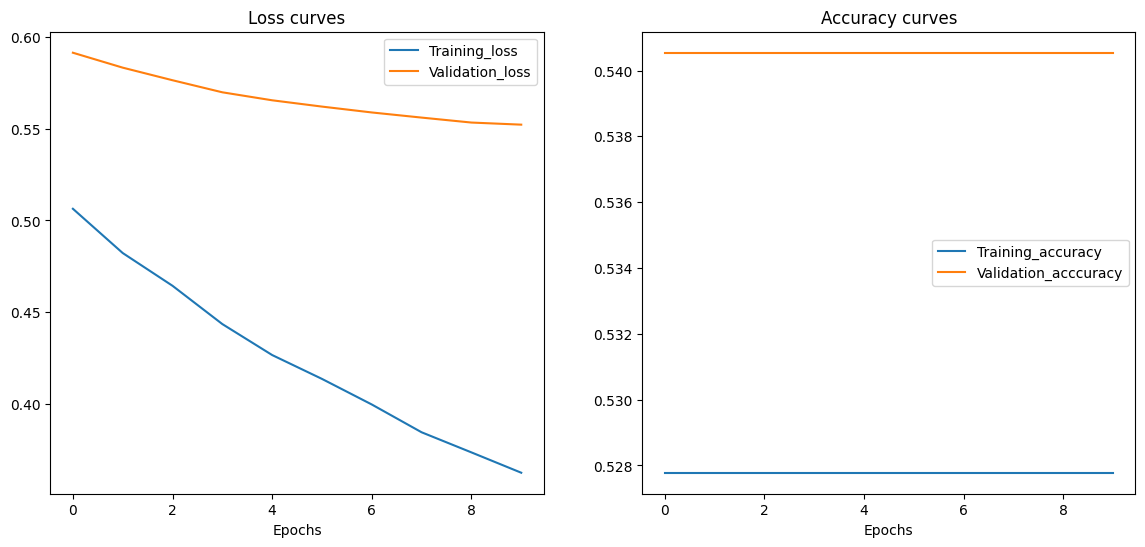

In [101]:
plot_curves(efficientnet_history)

In [111]:
efficientnet_history_2 = efficientnet_model.fit(train_aug,
                                              epochs=10,
                                              steps_per_epoch=len(train_aug),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 0.4024 - accuracy: 0.5278 - val_loss: 0.5504 - val_accuracy: 0.5405
Epoch 2/10
5/5 [==============================] - 11s 2s/step - loss: 0.4078 - accuracy: 0.5278 - val_loss: 0.5489 - val_accuracy: 0.5405
Epoch 3/10
5/5 [==============================] - 11s 2s/step - loss: 0.3961 - accuracy: 0.5278 - val_loss: 0.5470 - val_accuracy: 0.5405
Epoch 4/10
5/5 [==============================] - 9s 2s/step - loss: 0.3746 - accuracy: 0.5278 - val_loss: 0.5457 - val_accuracy: 0.5405
Epoch 5/10
5/5 [==============================] - 10s 2s/step - loss: 0.3774 - accuracy: 0.5278 - val_loss: 0.5440 - val_accuracy: 0.5405
Epoch 6/10
5/5 [==============================] - 11s 2s/step - loss: 0.3738 - accuracy: 0.5278 - val_loss: 0.5407 - val_accuracy: 0.5405
Epoch 7/10
5/5 [==============================] - 11s 2s/step - loss: 0.3792 - accuracy: 0.5278 - val_loss: 0.5374 - val_accuracy: 0.5405
Epoch 8/10
5/5 [===================

Training on augmented data isn't improved anything

In [113]:
efficientnet_history_3 = efficientnet_model.fit(train_data,
                                              epochs=10,
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data))

Epoch 1/10
5/5 [==============================] - 4s 718ms/step - loss: 0.2620 - accuracy: 0.5278 - val_loss: 0.5381 - val_accuracy: 0.5405
Epoch 2/10
5/5 [==============================] - 3s 562ms/step - loss: 0.2570 - accuracy: 0.5278 - val_loss: 0.5392 - val_accuracy: 0.5405
Epoch 3/10
5/5 [==============================] - 4s 741ms/step - loss: 0.2522 - accuracy: 0.5278 - val_loss: 0.5400 - val_accuracy: 0.5405
Epoch 4/10
5/5 [==============================] - 3s 564ms/step - loss: 0.2470 - accuracy: 0.5278 - val_loss: 0.5397 - val_accuracy: 0.5405
Epoch 5/10
5/5 [==============================] - 3s 653ms/step - loss: 0.2431 - accuracy: 0.5278 - val_loss: 0.5402 - val_accuracy: 0.5405
Epoch 6/10
5/5 [==============================] - 3s 555ms/step - loss: 0.2375 - accuracy: 0.5278 - val_loss: 0.5407 - val_accuracy: 0.5405
Epoch 7/10
5/5 [==============================] - 3s 654ms/step - loss: 0.2328 - accuracy: 0.5278 - val_loss: 0.5419 - val_accuracy: 0.5405
Epoch 8/10
5/5 [====

In [114]:
efficientnet_model.evaluate(test_data)

2/2 [==============================] - 2s 57ms/step - loss: 0.5450 - accuracy: 0.5405


[0.5449945330619812, 0.5405405163764954]

1/1 [==============================] - 3s 3s/step


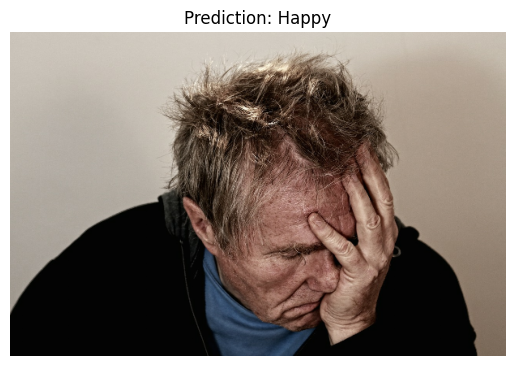

In [115]:
pred_and_plot(efficientnet_model, '/content/drive/MyDrive/Data/images/sad_image2.jpg', class_names)

1/1 [==============================] - 0s 27ms/step


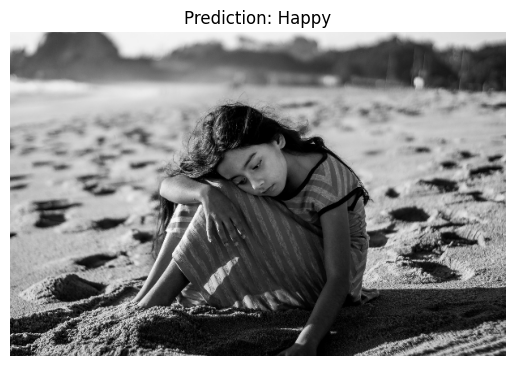

In [116]:
pred_and_plot(efficientnet_model, '/content/drive/MyDrive/Data/images/sad_image.jpg', class_names)

1/1 [==============================] - 0s 117ms/step


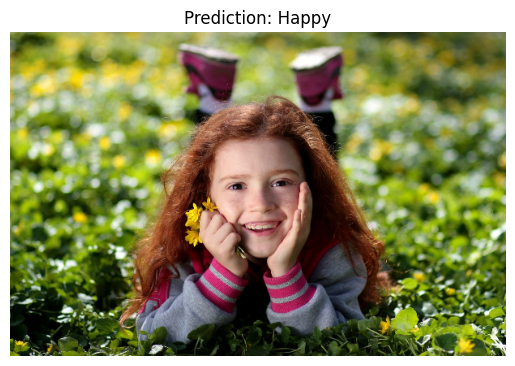

In [117]:
pred_and_plot(efficientnet_model, '/content/drive/MyDrive/Data/images/happy_2.jpg', class_names)

1/1 [==============================] - 0s 28ms/step


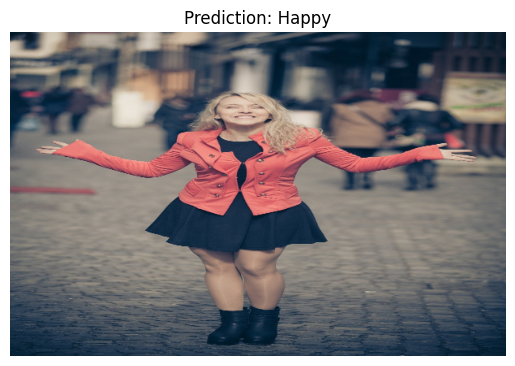

In [119]:
pred_and_plot(efficientnet_model, '/content/drive/MyDrive/Data/images/image_happy2.jpg', class_names)

1/1 [==============================] - 0s 46ms/step


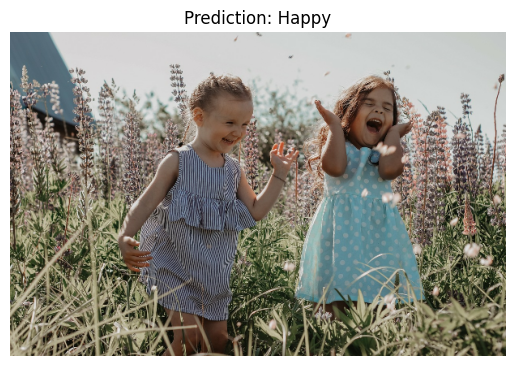

In [120]:
pred_and_plot(efficientnet_model, '/content/drive/MyDrive/Data/images/image_happy.jpg', class_names)

Using fine tuning